In [105]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt

In [47]:
data=pd.read_csv('../data/data.csv')

In [48]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
# Remove obvious unwanted columns
data.drop(['id', 'Unnamed: 32'],axis=1,inplace=True)

In [50]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [51]:
#Checking the null values
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# Descriptive statistics
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualization

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

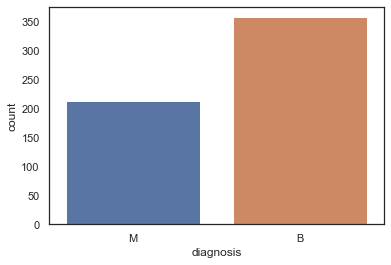

In [52]:
# Checking whether class imbalance exists"

sns.countplot(x=data['diagnosis'])

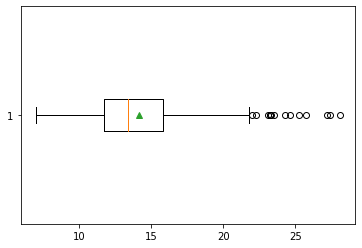

In [10]:
# Distribution of radius

plt.boxplot(data['radius_mean'],showfliers=True,showmeans=True,vert=False)
plt.show()

<AxesSubplot:title={'center':'radius_mean'}, xlabel='diagnosis'>

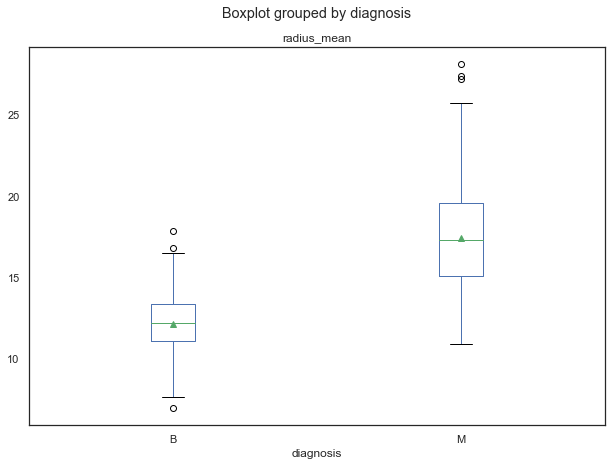

In [53]:
#Grouped based on the Diagnosis
data.boxplot(column='radius_mean',by='diagnosis',showmeans=True,figsize=(10,7),grid=False)

<AxesSubplot:xlabel='radius_mean', ylabel='radius_worst'>

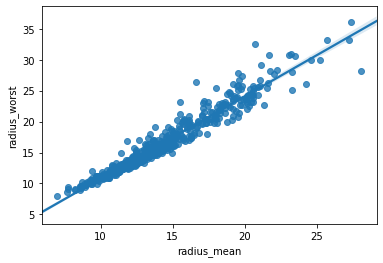

In [14]:
# Checking the correlation between radius_mean and radius_worst
sns.regplot(x='radius_mean',y='radius_worst',data=data)

In [16]:
def plot_box(df,col,split_by=None):
    assert col in df.select_dtypes(include=np.number).columns # Column must be present and numeric
    
    if not split_by:
        plt.figsize=(10,5)
        plt.boxplot(df[col],showfliers=True,showmeans=True,vert=False)
        plt.show()
    else:
        plt.figsize=(10,5)
        df.boxplot(column=col,by=split_by,showfliers=True,showmeans=True,vert=False,grid=False)
        plt.show()

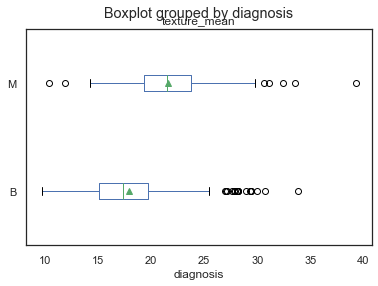

In [54]:
plot_box(data,'texture_mean',split_by='diagnosis')

## Correlation between two features

In [19]:
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [20]:
X=(X-X.mean())/X.std()#way to normalize the data from -1 to 1

In [55]:
# Adding the target variable to the required columns of interest 
data2=pd.concat([X.iloc[:,:10],y],axis=1)

In [22]:
data2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,M
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,M
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,M
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,M
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,M
...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,M
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,M
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,M
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,M


In [56]:
#Stacking the required features one over the other
data2_melt=pd.melt(data2,id_vars='diagnosis',var_name='features',value_name='value')

In [26]:
data2_melt

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
...,...,...,...
5685,M,fractal_dimension_mean,-0.930209
5686,M,fractal_dimension_mean,-1.057681
5687,M,fractal_dimension_mean,-0.894800
5688,M,fractal_dimension_mean,1.042778


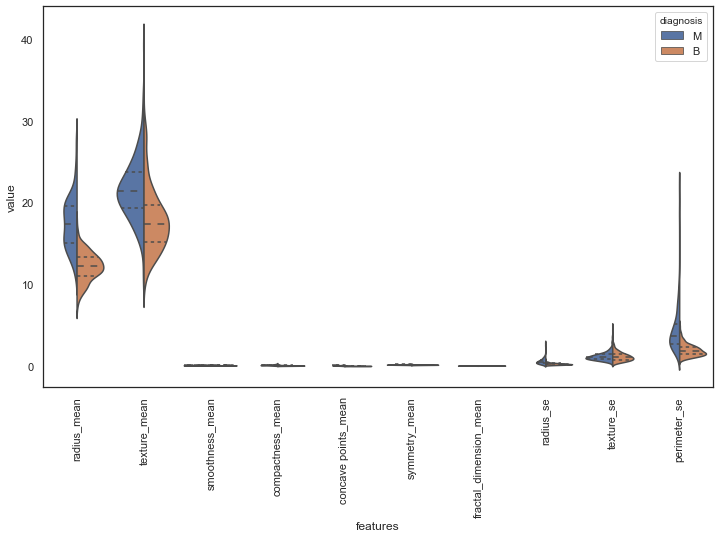

In [57]:
# Violin plot showing the distribution of the various features based on the Cancer type
plt.figure(figsize=(12,7))
sns.violinplot(x="features",y="value",hue="diagnosis",data=data2_melt,split=True,inner="quart")
plt.xticks(rotation=90)
plt.show()

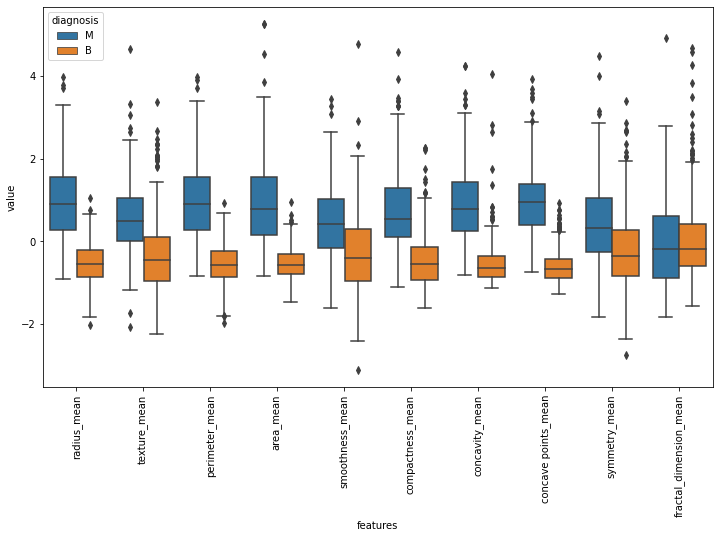

In [28]:
# Box plot showing the distribution of the various features based on the Cancer type
plt.figure(figsize=(12,7))
sns.boxplot(x="features",y="value",hue="diagnosis",data=data2_melt)
plt.xticks(rotation=90)                   
plt.show()      

### Correlation between three or more features?

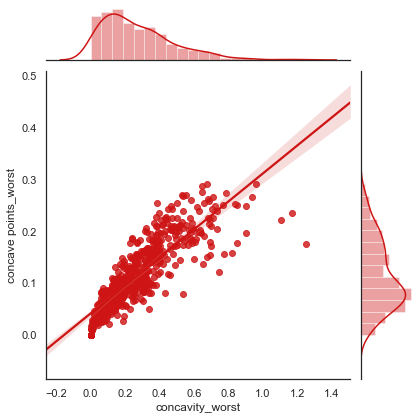

In [58]:
sns.jointplot(X.loc[:,'concavity_worst'],X.loc[:,'concave points_worst'],kind="reg",color="#CE1414")        

In [30]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Comparing textures based on tumour size

In [59]:
texture_mean=data2_melt[data2_melt['features'].str.contains('texture_mean')]

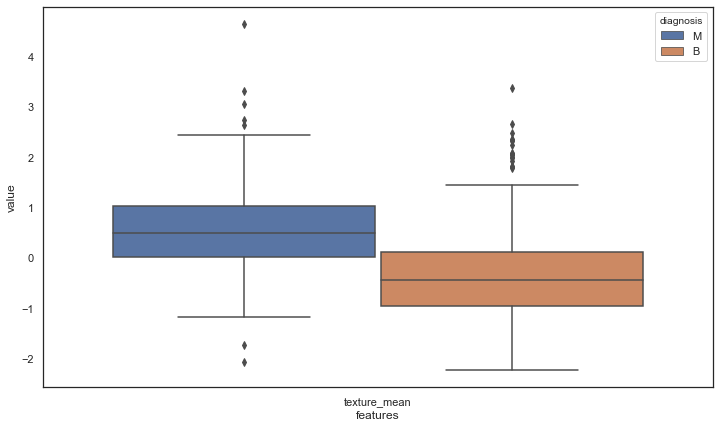

In [34]:
plt.figure(figsize=(12,7))
sns.boxplot(x="features",y="value",hue="diagnosis",data=texture_mean)
plt.xticks(rotation=0)
plt.show()

### Correlation map

<AxesSubplot:>

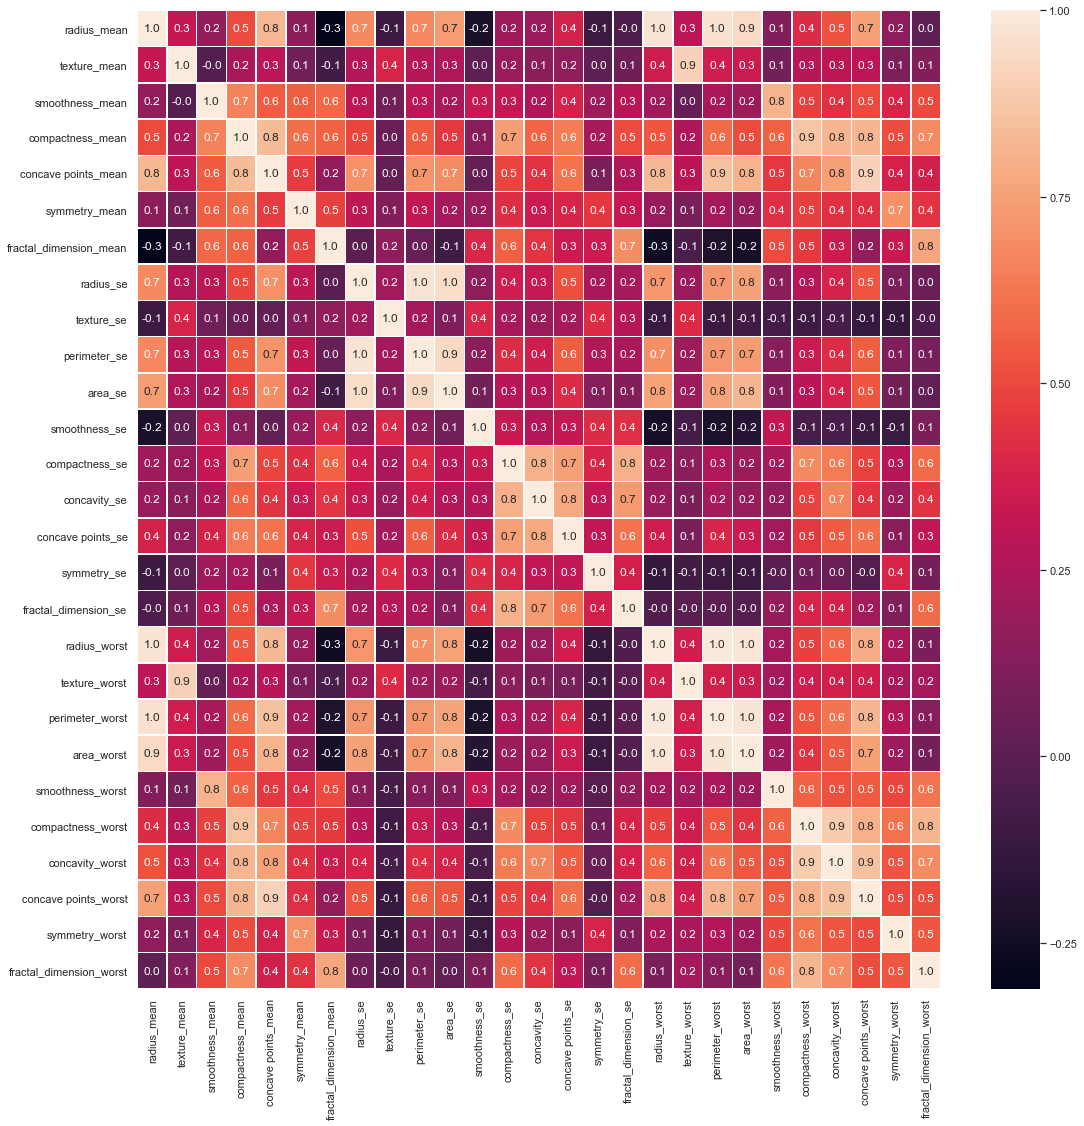

In [60]:
#correlation map
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

### Feature Selection and Random Forest Classification

In [76]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [86]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [74]:
print(X)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0           0.2419                 0.07871     1.0950      0.9053   
1           0.1812               

In [88]:
X.drop(['perimeter_mean','area_mean','concavity_mean'],axis=1,inplace=True)

In [90]:
X.drop(['concave points_mean','perimeter_se','area_se'],axis=1,inplace=True)

In [91]:
X.drop('compactness_se',axis=1,inplace=True)

In [92]:
#Drop all the worsts as the correlation is high
worst_cols=[c for c in X.columns if 'worst'in c]
X.drop(worst_cols,axis=1,inplace=True)

In [93]:
X.drop('concavity_se', axis=1, inplace=True)

In [94]:
X.drop(['fractal_dimension_mean', 'compactness_mean'], axis=1, inplace=True)

In [95]:
X.drop('radius_se', axis=1, inplace=True)

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Feature selection with correlation and random forest classification

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix, accuracy_score, classification_report

Accuracy is:  0.9473684210526315
              precision    recall  f1-score   support

           B       0.95      0.96      0.96       108
           M       0.94      0.92      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



C:\Users\Chetan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


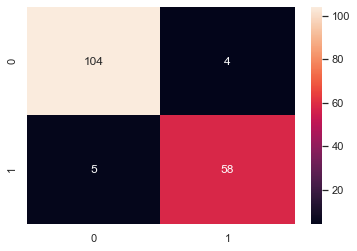

In [98]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
rf = RandomForestClassifier(random_state=43)      
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
sns.heatmap(cm,annot=True,fmt="d")

print(classification_report(y_test, y_pred))

### Univariate feature selection and random forest classification

In [99]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Find best scored 5 features
select_feature=SelectKBest(chi2,k=5).fit(X_train,y_train)

In [100]:
for col,score in zip(X_train.columns,select_feature.scores_):
    print(col,'-',round(score,4))

radius_mean - 177.9465
texture_mean - 60.6916
smoothness_mean - 0.1
symmetry_mean - 0.196
texture_se - 0.0407
smoothness_se - 0.0013
concave points_se - 0.2016
symmetry_se - 0.0014
fractal_dimension_se - 0.0027


 ### Recursive feature elimination (RFE) with random forest

In [101]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=rf,n_features_to_select=5,step=1)
rfe=rfe.fit(X_train,y_train)

In [102]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'symmetry_mean',
       'concave points_se'],
      dtype='object')


### Recursive feature elimination with cross validation and random forest classification

In [103]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv=RFECV(estimator=rf,step=1,cv=5,scoring='accuracy')  # 5-fold cross-validation
rfecv=rfecv.fit(X_train,y_train)
print("Optimal number of features:",rfecv.n_features_)
print("Best features:",X_train.columns[rfecv.support_])


Optimal number of features: 7
Best features: Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'symmetry_mean',
       'texture_se', 'concave points_se', 'symmetry_se'],
      dtype='object')


### Tree based feature selection and random forest classification

Feature ranking:
1. feature 0 (0.364879)
2. feature 1 (0.172231)
3. feature 6 (0.115454)
4. feature 2 (0.099708)
5. feature 7 (0.056295)
6. feature 8 (0.053859)
7. feature 3 (0.053854)
8. feature 4 (0.046127)
9. feature 5 (0.037593)


C:\Users\Chetan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


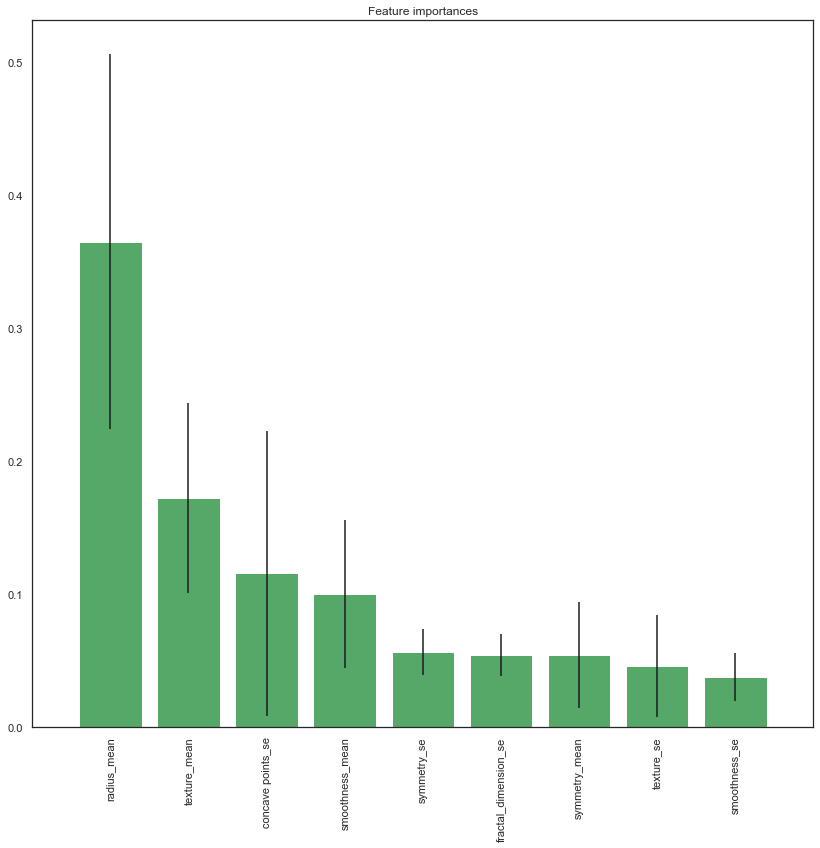

In [104]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Conclusion:

From the  above visualization & the previous feature selection methods , we can say that the features "radius_mean", texture_mean" are the most important factors to predict whether the Tumour is benign or Malignant